In [37]:
from ctd2xray import cchdo
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [66]:
ds_eddy = xr.open_dataset('/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00010_00001_ctd.nc')

In [88]:
ds_eddy

<xarray.Dataset>
Dimensions:         (latitude: 1, longitude: 1, pressure: 1922, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 1993-07-09T02:37:00
  * pressure        (pressure) float64 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 ...
  * latitude        (latitude) float64 54.49
  * longitude       (longitude) float64 -177.6
Data variables:
    pressure_QC     (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    temperature     (pressure) float64 7.202 7.201 7.202 7.201 7.202 7.2 ...
    temperature_QC  (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    salinity        (pressure) float64 33.02 33.02 33.02 33.02 33.02 33.02 ...
    salinity_QC     (pressure) int16 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    oxygen          (pressure) float64 304.7 305.6 305.8 304.2 303.2 303.6 ...
    oxygen_QC       (pressure) int16 7 7 2 2 7 7 2 7 2 7 2 2 2 2 2 2 2 2 2 2 ...
    woce_date       (time) int32 19930709
    woce_time       (time) int32 337
    station

In [94]:
ds_eddy.EXPOCODE

u'325023_1'

In [9]:
target_pressure = np.arange(1., 1000., 1.)

In [84]:
path_list = glob.glob('/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_000[0-1][0-9]_*.nc')

In [85]:
cchdo.open_cchdo_as_mfdataset()

['/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00012_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00013_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00011_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00010_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00015_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00014_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00016_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00017_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00018_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00019_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00008_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00009_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00006_00001_ctd.nc',
 '/home/cz2397/data/cchdo-ctd/498_p14n_nc_ctd/p14n_00007_00001_c

In [48]:
ds = cchdo.open_cchdo_as_mfdataset(path_list, target_pressure)
ds

<xarray.Dataset>
Dimensions:           (pressure_i: 999, time: 19)
Coordinates:
  * pressure_i        (pressure_i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 ...
    longitude         (time) float64 -178.3 -178.6 -177.9 -177.6 -179.0 ...
  * time              (time) datetime64[ns] 1993-07-09T13:35:00 ...
    latitude          (time) float64 53.5 53.0 54.0 54.49 52.26 52.5 52.07 ...
Data variables:
    woce_time         (time) int32 1435 2013 910 337 608 147 1004 1359 1744 ...
    temperature_i     (time, pressure_i) float64 6.987 6.986 6.984 6.982 ...
    oxygen_i          (time, pressure_i) float64 304.7 304.8 304.9 304.9 ...
    pressure_QC_i     (time, pressure_i) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    woce_date         (time) int32 19930709 19930709 19930709 19930709 ...
    salinity_i        (time, pressure_i) float64 32.98 32.98 32.98 32.98 ...
    cast              (time) |S40 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' ...
    station           (time) |S40 '12' '13' '11' '10' '15

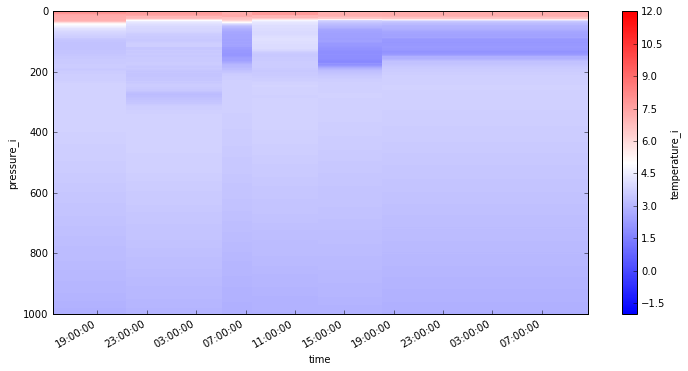

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
ds.temperature_i.T.plot(yincrease=False, ax=ax, vmin=-2, vmax=12, cmap='bwr')
fig.autofmt_xdate()

In [55]:
dslat = ds.swap_dims({'time': 'latitude'})

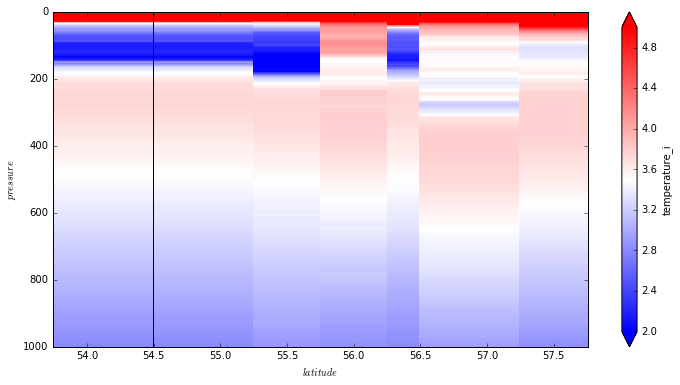

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
dslat.temperature_i.T.plot(yincrease=False, ax=ax, vmin=2, vmax=5, cmap='bwr')
plt.axvline(ds_eddy.latitude.values, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')

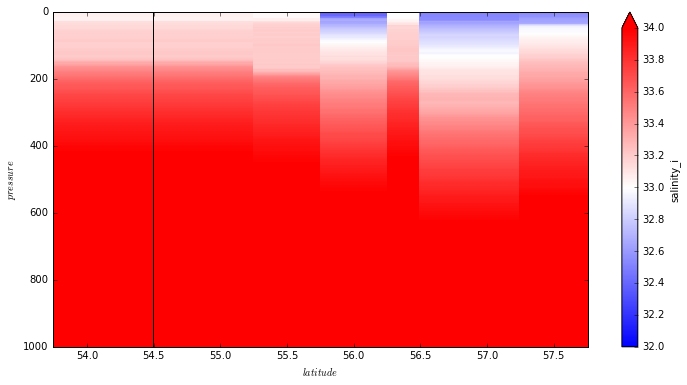

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))
dslat.salinity_i.T.plot(yincrease=False, ax=ax, vmin=32, vmax=34, cmap='bwr')
plt.axvline(ds_eddy.latitude.values, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')

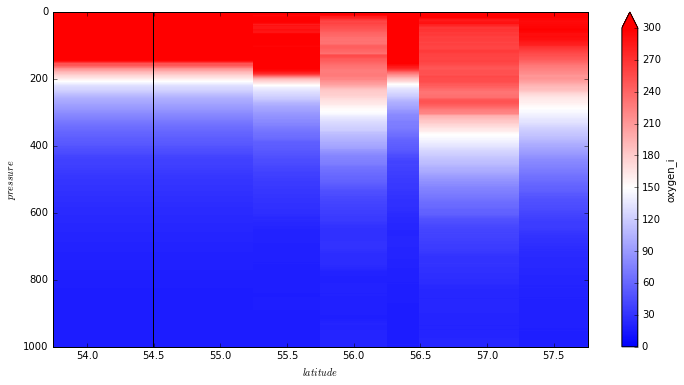

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))
dslat.oxygen_i.T.plot(yincrease=False, ax=ax, vmin=0, vmax=300, cmap='bwr')
plt.axvline(ds_eddy.latitude.values, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')